In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [22]:
# STOP HERE

In [23]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [26]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [29]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":63,"feels_like":62.85,"temp_min":59.58,"temp_max":65.48,"pressure":1013,"humidity":82},"visibility":10000,"wind":{"speed":3,"deg":336,"gust":15.01},"clouds":{"all":0},"dt":1626935841,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1626946022,"sunset":1626999241},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [30]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 63,
  'feels_like': 62.85,
  'temp_min': 59.58,
  'temp_max': 65.48,
  'pressure': 1013,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 336, 'gust': 15.01},
 'clouds': {'all': 0},
 'dt': 1626935841,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1626946022,
  'sunset': 1626999241},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [32]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [33]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 63,
  'feels_like': 62.85,
  'temp_min': 59.58,
  'temp_max': 65.48,
  'pressure': 1013,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 336, 'gust': 15.01},
 'clouds': {'all': 0},
 'dt': 1626935841,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1626946022,
  'sunset': 1626999241},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [34]:
# Get the JSON data.
boston_data = city_weather.json()

In [35]:
boston_data['sys']['country']

'US'

In [36]:
boston_data['dt']

1626935841

In [37]:
boston_data['coord']['lat']

42.3584

In [38]:
boston_data["main"]["temp_max"]

65.48

In [39]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 65.48 82 0 3


In [40]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-07-22 06:37:21'

# 6.2.6 Get the City Weather Data

In [41]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [43]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [44]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nelson bay
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | boda
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | navahrudak
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | ballina
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | lleida
Processing Record 16 of Set 1 | balabac
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | njeru
Processing Record 22 of Set 1 | waipawa
Processing Record 23 of Set 1 | pevek
Processing Record 24 of Set 1 | saint-ph

Processing Record 39 of Set 4 | waitati
Processing Record 40 of Set 4 | dondo
Processing Record 41 of Set 4 | chifeng
Processing Record 42 of Set 4 | ogulin
Processing Record 43 of Set 4 | viedma
Processing Record 44 of Set 4 | wajir
Processing Record 45 of Set 4 | awbari
Processing Record 46 of Set 4 | homa bay
Processing Record 47 of Set 4 | santiago del estero
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | watsa
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | toftir
City not found. Skipping...
Processing Record 2 of Set 5 | hua hin
Processing Record 3 of Set 5 | henties bay
Processing Record 4 of Set 5 | anloga
Processing Record 5 of Set 5 | butaritari
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | ribeira grande
Processing Record 9 of Set 5 | airai
Processing Record 10 of Set 5 | tuktoyaktuk
Processing Record 11 of Set 5 | college
Processing Record 12 of Se

Processing Record 31 of Set 8 | berbera
Processing Record 32 of Set 8 | corn island
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | bossangoa
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | fomboni
Processing Record 37 of Set 8 | bairiki
Processing Record 38 of Set 8 | zhuhai
Processing Record 39 of Set 8 | mpraeso
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | south venice
Processing Record 42 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | tiksi
Processing Record 45 of Set 8 | ucluelet
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | vardo
Processing Record 48 of Set 8 | panguipulli
Processing Record 49 of Set 8 | baykit
Processing Record 50 of Set 8 | ligayan
Processing Record 1 of Set 9 | lolua
City not found. Skipping...
Processing Record 2 of

Processing Record 14 of Set 12 | vostok
Processing Record 15 of Set 12 | kijang
Processing Record 16 of Set 12 | saint-augustin
Processing Record 17 of Set 12 | oneonta
Processing Record 18 of Set 12 | miraflores
Processing Record 19 of Set 12 | sulphur
Processing Record 20 of Set 12 | santa juliana
Processing Record 21 of Set 12 | sault sainte marie
Processing Record 22 of Set 12 | harper
Processing Record 23 of Set 12 | chongoyape
Processing Record 24 of Set 12 | mangai
Processing Record 25 of Set 12 | winnemucca
Processing Record 26 of Set 12 | poltava
Processing Record 27 of Set 12 | tongliao
Processing Record 28 of Set 12 | sorrento
Processing Record 29 of Set 12 | birin
Processing Record 30 of Set 12 | bolshaya rechka
Processing Record 31 of Set 12 | kahului
Processing Record 32 of Set 12 | la seyne-sur-mer
Processing Record 33 of Set 12 | viligili
City not found. Skipping...
Processing Record 34 of Set 12 | mbarara
Processing Record 35 of Set 12 | cavalcante
Processing Record 36

In [45]:
len(city_data)

575

# 5.2.7 Create a DataFrame of City Weather Data

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nelson Bay,-32.7167,152.1500,60.85,69,56,10.13,AU,2021-07-22 06:43:32
1,Provideniya,64.3833,-173.3000,50.11,66,75,11.18,RU,2021-07-22 06:43:33
2,Chuy,-33.6971,-53.4616,45.19,78,100,4.72,UY,2021-07-22 06:43:33
3,Boda,4.3189,17.4695,73.27,81,100,4.47,CF,2021-07-22 06:43:33
4,Bluff,-46.6000,168.3333,46.80,67,8,9.93,NZ,2021-07-22 06:43:34
5,Caravelas,-17.7125,-39.2481,66.88,84,22,1.83,BR,2021-07-22 06:43:34
6,Punta Arenas,-53.1500,-70.9167,35.71,93,75,5.75,CL,2021-07-22 06:43:35
7,Lagoa,39.0500,-27.9833,66.94,75,76,16.11,PT,2021-07-22 06:43:35
8,Navahrudak,53.6000,25.8333,62.47,60,0,6.22,BY,2021-07-22 06:43:36
9,Cape Town,-33.9258,18.4232,45.88,93,75,1.01,ZA,2021-07-22 06:42:17


In [47]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nelson Bay,AU,2021-07-22 06:43:32,-32.7167,152.1500,60.85,69,56,10.13
1,Provideniya,RU,2021-07-22 06:43:33,64.3833,-173.3000,50.11,66,75,11.18
2,Chuy,UY,2021-07-22 06:43:33,-33.6971,-53.4616,45.19,78,100,4.72
3,Boda,CF,2021-07-22 06:43:33,4.3189,17.4695,73.27,81,100,4.47
4,Bluff,NZ,2021-07-22 06:43:34,-46.6000,168.3333,46.80,67,8,9.93
5,Caravelas,BR,2021-07-22 06:43:34,-17.7125,-39.2481,66.88,84,22,1.83
6,Punta Arenas,CL,2021-07-22 06:43:35,-53.1500,-70.9167,35.71,93,75,5.75
7,Lagoa,PT,2021-07-22 06:43:35,39.0500,-27.9833,66.94,75,76,16.11
8,Navahrudak,BY,2021-07-22 06:43:36,53.6000,25.8333,62.47,60,0,6.22
9,Cape Town,ZA,2021-07-22 06:42:17,-33.9258,18.4232,45.88,93,75,1.01


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Lat and Temp

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [50]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/21/21'

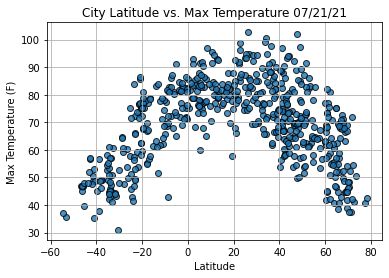

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

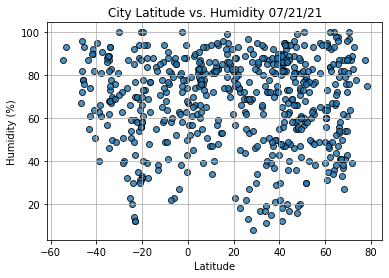

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

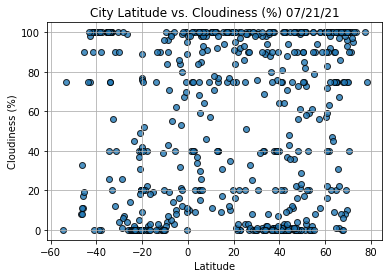

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

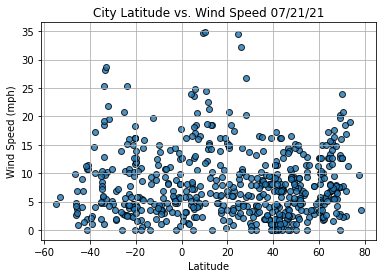

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# 6.4.2 Linear Regression - Find the Correlation Between Latitude and Maximum Temperature 

In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
index13 = city_data_df.loc[13]
index13

City                       Lleida
Country                        ES
Date          2021-07-22 06:43:38
Lat                       41.6167
Lng                        0.6167
Max Temp                     79.0
Humidity                       47
Cloudiness                      0
Wind Speed                   11.5
Name: 13, dtype: object

In [61]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
570    False
571     True
572     True
573    False
574     True
Name: Lat, Length: 575, dtype: bool

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Provideniya,RU,2021-07-22 06:43:33,64.3833,-173.3000,50.11,66,75,11.18
3,Boda,CF,2021-07-22 06:43:33,4.3189,17.4695,73.27,81,100,4.47
7,Lagoa,PT,2021-07-22 06:43:35,39.0500,-27.9833,66.94,75,76,16.11
8,Navahrudak,BY,2021-07-22 06:43:36,53.6000,25.8333,62.47,60,0,6.22
10,Thompson,CA,2021-07-22 06:43:37,55.7435,-97.8558,64.56,77,90,2.30


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Lat to Max Temp

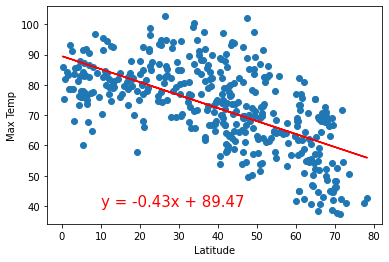

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [92]:
linregress(x_values,y_values)

LinregressResult(slope=-0.4282505718742641, intercept=89.47014079837646, rvalue=-0.627531996321263, pvalue=5.780731539387923e-45, stderr=0.02670076703558755, intercept_stderr=1.179235015218608)

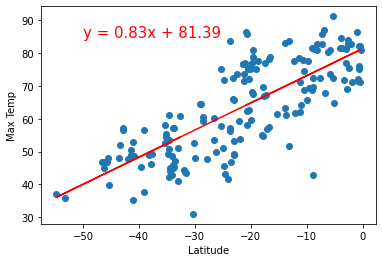

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

In [68]:
linregress(x_values,y_values)

LinregressResult(slope=0.8274150319502712, intercept=81.38926289200217, rvalue=0.7735606568084534, pvalue=1.6672232628678277e-36, stderr=0.05123998278236757, intercept_stderr=1.317918349202064)

# Lat to Humidity

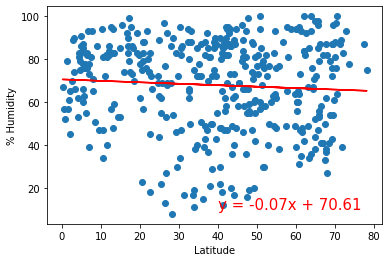

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [94]:
linregress(x_values,y_values)

LinregressResult(slope=-0.06760124410435235, intercept=70.60811662434186, rvalue=-0.06498928570079954, pvalue=0.19572678022238846, stderr=0.05216104037549571, intercept_stderr=2.3036838289714163)

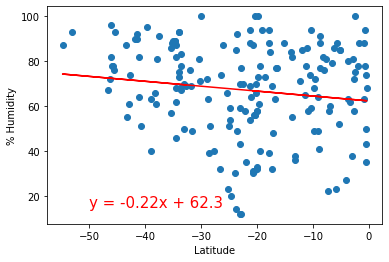

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [74]:
linregress(x_values,y_values)

LinregressResult(slope=-0.21844717440438233, intercept=62.29877254592899, rvalue=-0.1415695315151879, pvalue=0.06016353791256198, stderr=0.1154679242500544, intercept_stderr=2.969893584074098)

# Lat to Cloudiness

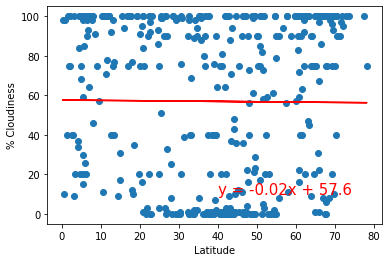

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [97]:
linregress(x_values,y_values)

LinregressResult(slope=-0.0170864772022994, intercept=57.604681001249176, rvalue=-0.00848711886011396, pvalue=0.865963410578964, stderr=0.10116470329911637, intercept_stderr=4.467922598460075)

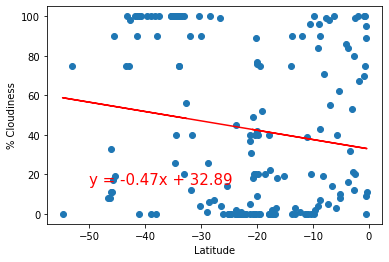

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

In [77]:
linregress(x_values,y_values)

LinregressResult(slope=-0.47260439107149677, intercept=32.88584708768711, rvalue=-0.15463722789968182, pvalue=0.03986775232199986, stderr=0.22824906629163913, intercept_stderr=5.870681766846806)

# Lat to Wind Speed

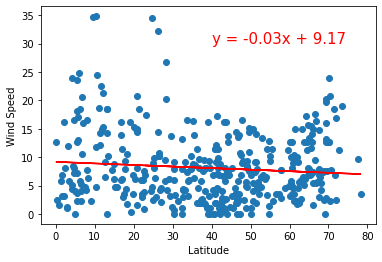

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

In [90]:
linregress(x_values,y_values)

LinregressResult(slope=-0.02747924320949267, intercept=9.172486242681112, rvalue=-0.09149311140083494, pvalue=0.06824784343763705, stderr=0.015029460450807072, intercept_stderr=0.6637736661202603)

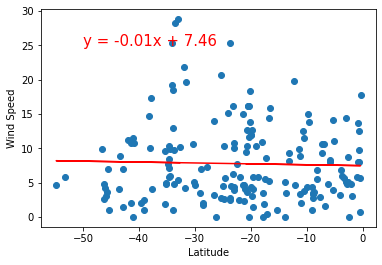

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [88]:
linregress(x_values,y_values)

LinregressResult(slope=-0.013120128635996474, intercept=7.460176343340715, rvalue=-0.030453001420545828, pvalue=0.6874090907822821, stderr=0.03255273579590339, intercept_stderr=0.8372728774005579)